In [25]:
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from hydra import compose, initialize
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

pl.Config.set_fmt_str_lengths(100)


def draw_venn2(train, test, rows, columns, x_size, y_size):
    fig, axes = plt.subplots(rows, columns, figsize=(x_size, y_size))
    column_names = test.columns
    for col, ax in zip(column_names, axes.ravel(), strict=False):
        venn2(
            subsets=(set(train[col].dropna().unique()), set(test[col].dropna().unique())),
            set_labels=("train", "test"),
            ax=ax,
        )
        ax.set_title(col)
    fig.tight_layout()


with initialize(config_path="config", version_base=None):
    cfg = compose(config_name="config")
    cfg.exp_number = Path().resolve().name


In [26]:
train_df = pl.read_csv(cfg.data.train_path, try_parse_dates=True)
cloth_df = pl.read_csv(cfg.data.cloth_path, try_parse_dates=True)
test_df = pl.read_csv(cfg.data.test_path, try_parse_dates=True)
# sub_df = pl.read_csv(cfg.data.sample_submission_path)


In [27]:
print("■ train")
display(train_df.head())
print("■ test")
display(test_df.head())
print("■ cloth")
display(cloth_df.head())
# print("■ submission")
# display(sub_df.head())


■ train


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
i64,i64,str,str,i64,i64,i64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lined and very slimming. i had to size up b/c it runs a bit snug around t…",5,1,4
0,39,"""Very cute""","""Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipp…",5,1,0
0,42,"""Beautiful! fruns small for typical retailer sizing""","""I love this skirt! i wasn't sure about the mix of the back pattern with the front but it works! it i…",5,1,5
0,45,null,"""I was really pleased with this skirt. the lightness of the fabric is nice and the colors matched the…",5,1,9
0,57,"""Unique, pretty asymmetric skirt""","""I saw this skirt in retailer several months ago and while it caught my eye, it was pricey. so i wait…",5,1,1


■ test


Clothing ID,Age,Title,Review Text,Positive Feedback Count
i64,i64,str,str,i64
0,32,"""So happy i bought this skirt!""","""I love this skirt. it does run a little small, i ordered an extra small and it is tight at the waist…",0
0,34,"""Runs small""","""Beautiful patterns and colors, but it sits very high and runs small. i'm normally a size 4 and got t…",0
0,37,"""Love the comfort of thi skirt""","""It is easily paired with a nice tip for work and feels great to wear all day""",0
0,39,"""Way too small""","""This is a beautiful skirt, but runs very small. i usually wear a size 8 and could not get the side z…",10
0,39,null,"""I usually wear a size 8/10 and i needed a large in this skirt. it flows so beautifully!""",0


■ cloth


Clothing ID,Division Name,Department Name,Class Name
i64,str,str,str
0,"""General""","""Bottoms""","""Skirts"""
1,"""General""","""Bottoms""","""Pants"""
2,"""General""","""Tops""","""Sweaters"""
3,"""General""","""Dresses""","""Dresses"""
4,"""General""","""Dresses""","""Dresses"""


In [28]:
print("■ train")
display(train_df.describe())
print(train_df.dtypes)
print(f"行数: {train_df.shape[0]}, 列数: {train_df.shape[1]}")

print("\n■ test")
display(test_df.describe())
print(test_df.dtypes)
print(f"行数: {test_df.shape[0]}, 列数: {test_df.shape[1]}")

print("\n■ cloth")
display(cloth_df.describe())
print(cloth_df.dtypes)
print(f"行数: {cloth_df.shape[0]}, 列数: {cloth_df.shape[1]}")


■ train


statistic,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
str,f64,f64,str,str,f64,f64,f64
"""count""",10000.0,10000.0,"""8425""","""8720""",10000.0,10000.0,10000.0
"""null_count""",0.0,0.0,"""1575""","""1280""",0.0,0.0,0.0
"""mean""",123.6563,43.3936,null,null,4.1884,0.8202,2.6293
"""std""",65.693931,12.319564,null,null,1.112668,0.38404,5.820728
"""min""",0.0,18.0,"""""go to"" tee for sz 10+ women""","""#childsize. not sure where this went wrong but it's going back immediately. always wear a 0-2 in ret…",1.0,0.0,0.0
"""25%""",65.0,34.0,null,null,4.0,1.0,0.0
"""50%""",129.0,41.0,null,null,5.0,1.0,1.0
"""75%""",170.0,52.0,null,null,5.0,1.0,3.0
"""max""",232.0,99.0,"""~~so very retailer~~""","""You would expect anything woolen to be slightly scratchy. this is incredibly soft. i couldn't belive…",5.0,1.0,99.0


[Int64, Int64, String, String, Int64, Int64, Int64]
行数: 10000, 列数: 7

■ test


statistic,Clothing ID,Age,Title,Review Text,Positive Feedback Count
str,f64,f64,str,str,f64
"""count""",11155.0,11155.0,"""9335""","""9749""",11155.0
"""null_count""",0.0,0.0,"""1820""","""1406""",0.0
"""mean""",123.940027,43.290184,null,null,2.592201
"""std""",65.418225,12.222174,null,null,5.945481
"""min""",0.0,18.0,"""""beach business""""","""""does this sweater make my hips look big?"" my wife asked. this sweater was one of my christmas gifts…",0.0
"""25%""",70.0,34.0,null,null,0.0
"""50%""",129.0,41.0,null,null,1.0
"""75%""",170.0,52.0,null,null,3.0
"""max""",232.0,99.0,"""Zowie!""","""Yummy, soft material, but very faded looking. so much so that i am sending it back. if a faded look …",122.0


[Int64, Int64, String, String, Int64]
行数: 11155, 列数: 5

■ cloth


statistic,Clothing ID,Division Name,Department Name,Class Name
str,f64,str,str,str
"""count""",233.0,"""233""","""233""","""233"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",116.0,null,null,null
"""std""",67.405489,null,null,null
"""min""",0.0,"""General""","""Bottoms""","""Blouses"""
"""25%""",58.0,null,null,null
"""50%""",116.0,null,null,null
"""75%""",174.0,null,null,null
"""max""",232.0,"""Initmates""","""Trend""","""Trend"""


[Int64, String, String, String]
行数: 233, 列数: 4


### Train


In [29]:
train_df.head()


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
i64,i64,str,str,i64,i64,i64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lined and very slimming. i had to size up b/c it runs a bit snug around t…",5,1,4
0,39,"""Very cute""","""Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipp…",5,1,0
0,42,"""Beautiful! fruns small for typical retailer sizing""","""I love this skirt! i wasn't sure about the mix of the back pattern with the front but it works! it i…",5,1,5
0,45,null,"""I was really pleased with this skirt. the lightness of the fabric is nice and the colors matched the…",5,1,9
0,57,"""Unique, pretty asymmetric skirt""","""I saw this skirt in retailer several months ago and while it caught my eye, it was pricey. so i wait…",5,1,1


In [30]:
train_df.shape


(10000, 7)

In [31]:
# title, review textに欠損あり
train_df.null_count()


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
u32,u32,u32,u32,u32,u32,u32
0,0,1575,1280,0,0,0


In [32]:
# 各列のユニーク数
print("各列のユニーク数:")
display(train_df.select(pl.all().n_unique()))

# Review Textは一意
# Titleは一意ではない？


各列のユニーク数:


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
u32,u32,u32,u32,u32,u32,u32
233,73,6422,8721,5,2,65


Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
f64,f64,f64,f64,f64
1.0,-0.022604,0.013598,0.004254,-0.006449
-0.022604,1.0,0.021359,0.023563,0.035068
0.013598,0.021359,1.0,0.791016,-0.057499
0.004254,0.023563,0.791016,1.0,-0.075364
-0.006449,0.035068,-0.057499,-0.075364,1.0


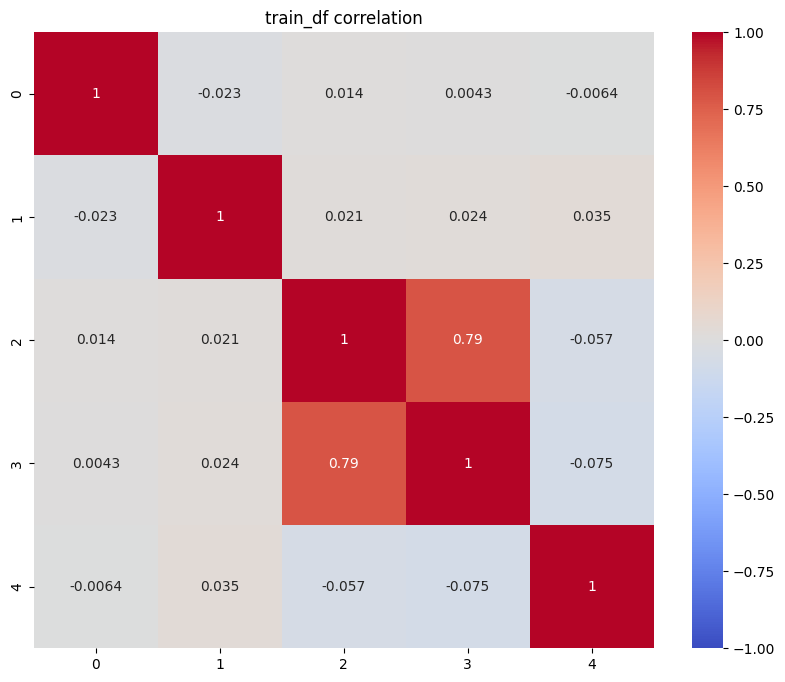

In [39]:
# train_dfの相関係数
train_corr = train_df.select(["Clothing ID", "Age","Rating", "Recommended IND", "Positive Feedback Count"]).corr()

display(train_corr)

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(train_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("train_df correlation")
plt.show()


In [36]:
train_corr


Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
f64,f64,f64,f64,f64
1.0,-0.022604,0.013598,0.004254,-0.006449
-0.022604,1.0,0.021359,0.023563,0.035068
0.013598,0.021359,1.0,0.791016,-0.057499
0.004254,0.023563,0.791016,1.0,-0.075364
-0.006449,0.035068,-0.057499,-0.075364,1.0


### Clothes

In [19]:
cloth_df.shape


(233, 4)

In [11]:
cloth_df.head()


Clothing ID,Division Name,Department Name,Class Name
i64,str,str,str
0,"""General""","""Bottoms""","""Skirts"""
1,"""General""","""Bottoms""","""Pants"""
2,"""General""","""Tops""","""Sweaters"""
3,"""General""","""Dresses""","""Dresses"""
4,"""General""","""Dresses""","""Dresses"""


In [13]:
# 欠損値はなし
cloth_df.null_count()


Clothing ID,Division Name,Department Name,Class Name
u32,u32,u32,u32
0,0,0,0


In [18]:
# 各列のユニーク数
print("各列のユニーク数:")
display(cloth_df.select(pl.all().n_unique()))


各列のユニーク数:


Clothing ID,Division Name,Department Name,Class Name
u32,u32,u32,u32
233,3,6,16


### target

<Axes: >

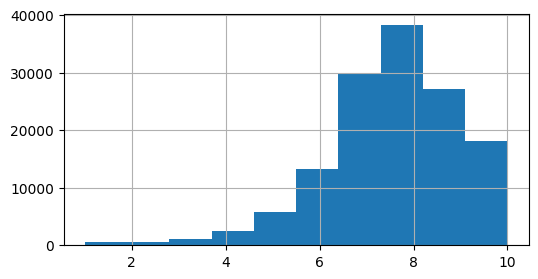

In [6]:
train_df[cfg.target].hist(bins=10, figsize=(6, 3))


In [7]:
for c in train_df.columns:
    display(train_df[c].value_counts(dropna=False))


user_id
61c04a903417d6ed0500    326
87e8bf4369b122472f54    320
66e8ad1b15e37ffe34d8    310
445bd5c54308fc81763d    297
201b3dde31e826ba2030    296
                       ... 
f0cf163dc9f6df380958      1
d7b6bf8a99fdd3889579      1
d747358f72dd5774d845      1
a0ea782492772a5e05f7      1
bf3cbfa1d3b161eaf3e8      1
Name: count, Length: 1794, dtype: int64

anime_id
a5ccc0a38f18f309d4f3    641
35d87d3bdeed620ef335    604
e97089fa8701bdc3bd6b    563
a707c12cacdeb5c5ccec    504
4819655fa52cbafe9c8b    476
                       ... 
56ac71e01ef6a09ca869      3
7937a8344408e7f5f783      3
71ce770d58dc410571f8      1
867934bc2a611a8423da      1
1e9b3a43745594039e42      1
Name: count, Length: 1954, dtype: int64

score
8     38214
7     29670
9     27061
10    18037
6     13211
5      5761
4      2425
3      1017
2       520
1       485
Name: count, dtype: int64

genres
Action, Game, Adventure, Romance, Fantasy                          1310
Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen    1220
Slice of Life, Comedy, Drama, Romance, School                      1163
Ecchi, School, Shounen                                             1024
Slice of Life, Comedy                                               906
                                                                   ... 
Action, Drama, Romance, Sci-Fi                                        5
Demons, Fantasy, Magic, Supernatural                                  4
Harem, Comedy, Supernatural, Romance, Ecchi, School, Shounen          3
Mystery, Drama                                                        3
Sci-Fi, Mystery, Psychological, Thriller, Shounen                     1
Name: count, Length: 1316, dtype: int64

japanese_name
僕のヒーローアカデミア      1107
ワンパンマン            754
デスノート             641
進撃の巨人             604
ソードアート・オンライン      563
                 ... 
戦×恋（ヴァルラヴ）          3
エンドライド              3
池袋ウエストゲートパーク        3
生徒会役員共＊ OAD         1
ヲタクに恋は難しい OAD       1
Name: count, Length: 1892, dtype: int64

type
TV         106114
Movie       17670
OVA          6219
Special      4484
ONA          1792
Music         122
Name: count, dtype: int64

episodes
12     40998
1      23504
13     18292
24     10641
25      9166
       ...  
100       14
109       11
147       11
76         7
146        5
Name: count, Length: 93, dtype: int64

aired
Jan 10, 2012 to Mar 27, 2012    644
Oct 4, 2006 to Jun 27, 2007     641
Oct 4, 2013 to Mar 28, 2014     608
Apr 7, 2013 to Sep 29, 2013     604
Apr 5, 2006 to Sep 27, 2006     596
                               ... 
Sep 18, 2020                      4
Oct 5, 2019 to Dec 21, 2019       3
May 16, 2014 to Sep 17, 2020      1
Jan 8, 2021 to ?                  1
Mar 29, 2019 to Feb 26, 2021      1
Name: count, Length: 1626, dtype: int64

producers
Unknown                                                                                                              8521
Aniplex                                                                                                              2040
Aniplex, Kodansha                                                                                                    1074
Fuji TV                                                                                                               984
Production I.G, Dentsu, Mainichi Broadcasting System, Pony Canyon, Kodansha, Techno Sound, Pony Canyon Enterprise     841
                                                                                                                     ... 
Aniplex, Houbunsha, Kansai Telecasting, Lawson, Kinoshita Group Holdings, Drecom                                        5
Asmik Ace, Cygames, Happinet                                                                                            4
VAP, Nippon Te

licensors
Funimation                                               36510
Sentai Filmworks                                         25221
Unknown                                                  15685
Aniplex of America                                       14294
VIZ Media                                                 7177
                                                         ...  
Bandai, Sentai Filmworks                                    15
Nozomi Entertainment, Bandai Entertainment, NYAV Post       14
Super Techno Arts                                           13
Funimation, NBCUniversal Entertainment Japan                10
Discotek Media, Ponycan USA                                  9
Name: count, Length: 133, dtype: int64

studios
Madhouse                                            9067
A-1 Pictures                                        8447
J.C.Staff                                           8150
Bones                                               6748
Kyoto Animation                                     6043
                                                    ... 
TMS Entertainment, Shin-Ei Animation                   8
B.CMAY PICTURES, Colored-Pencil Animation Design       8
Production I.G, Trans Arts                             8
Production I.G, Nut, Revoroot                          6
A-1 Pictures, Lapin Track                              1
Name: count, Length: 265, dtype: int64

source
Manga            60830
Light novel      31278
Original         21516
Visual novel      7122
Web manga         3779
4-koma manga      3652
Novel             3522
Game              2964
Other             1184
Music              294
Card game          162
Book                61
Digital manga       37
Name: count, dtype: int64

duration
24 min. per ep.         60941
23 min. per ep.         32468
25 min. per ep.          7569
22 min. per ep.          4716
24 min.                  1382
                        ...  
1 hr. 2 min. per ep.       14
35 min. per ep.            13
2 hr. 16 min.              12
2 hr. 20 min.              10
2 hr. 2 min.                9
Name: count, Length: 150, dtype: int64

rating
PG-13 - Teens 13 or older         81769
R - 17+ (violence & profanity)    35779
R+ - Mild Nudity                  13454
PG - Children                      2768
G - All Ages                       2564
Rx - Hentai                          53
Unknown                              14
Name: count, dtype: int64

members
2589552    641
2531397    604
2214395    563
2123866    504
1591773    476
          ... 
61776        3
66395        3
62844        1
482725       1
90626        1
Name: count, Length: 1949, dtype: int64

watching
122401    641
140753    604
80304     563
41249     518
96568     504
         ... 
7547        3
11081       3
24871       1
260775      1
46279       1
Name: count, Length: 1858, dtype: int64

completed
2146116    641
2182587    604
1907261    563
1841220    504
1229098    476
          ... 
24662        3
18894        3
7413         1
60           1
327          1
Name: count, Length: 1949, dtype: int64

on_hold
75054    641
37345    604
25632    563
3124     531
30271    504
        ... 
2038       3
2108       3
8019       1
6458       1
10053      1
Name: count, Length: 1782, dtype: int64

dropped
80834    641
44635    604
90661    563
26755    504
38209    476
        ... 
8442       3
16759      3
6603       3
6966       1
857        1
Name: count, Length: 1782, dtype: int64

plan_to_watch
165147    641
126077    604
110537    563
129052    504
234430    476
         ... 
18647       3
27709       3
21037       1
208466      1
33110       1
Name: count, Length: 1932, dtype: int64